# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

In [2]:
latur_dist = pd.read_csv("datasets/latur_dist.csv", sep=',', skiprows=25)

osmanabad_dist = pd.read_csv("datasets/osmanabad_dist.csv", sep=',', skiprows=25)

# Features Description

|PARAMETERS      |DESCRIPTION                                       |
|--              |--                                                |
|PS              |    MERRA-2 Surface Pressure (kPa)                |
|TS              |    MERRA-2 Earth Skin Temperature (C)            |
|T2M             |    MERRA-2 Temperature at 2 Meters (C)           |
|QV2M            |    MERRA-2 Specific Humidity at 2 Meters (g/kg)  |
|RH2M            |    MERRA-2 Relative Humidity at 2 Meters (%)     |   
|WD2M            |    MERRA-2 Wind Direction at 2 Meters (Degrees)  |   
|WS2M            |    MERRA-2 Wind Speed at 2 Meters (m/s)          |
|T2MDEW          |    MERRA-2 Dew/Frost Point at 2 Meters (C)       |
|T2MWET          |    MERRA-2 Wet Bulb Temperature at 2 Meters (C)  |
|GWETTOP         |    MERRA-2 Surface Soil Wetness (1)              |
|GWETPROF        |    MERRA-2 Profile Soil Moisture (1)             |
|GWETROOT        |    MERRA-2 Root Zone Soil Wetness (1)            |
|WS2M_MAX        |    MERRA-2 Wind Speed at 2 Meters Maximum (m/s)  |
|WS2M_MIN        |    MERRA-2 Wind Speed at 2 Meters Minimum (m/s)  |
|WS2M_RANGE      |    MERRA-2 Wind Speed at 2 Meters Range (m/s)    |
|PRECTOTCORR     |    MERRA-2 Precipitation Corrected (mm/day)      |
|PRECTOTCORR_SUM |    MERRA-2 Precipitation Corrected Sum (mm)      |

# Data Transformation

In [3]:
year_list = latur_dist['YEAR'].unique()

district = pd.DataFrame()
for year in year_list:
    per_year_data = latur_dist[latur_dist['YEAR']==year].drop(columns=['YEAR'], axis=1).set_index(['PARAMETER']).T.reset_index().rename(columns={'index': 'MONTH'})
    per_year_data.insert(0, 'YEAR', year)
    per_year_data.columns.name = ''
    district = pd.concat([district, per_year_data], ignore_index=True)

In [52]:
district.head()

YEAR MONTH     PS     TS    T2M   QV2M   RH2M    WD2M  WS2M  T2MDEW  \
0  1981   JAN  95.18  21.40  20.40   7.08  49.19   70.56  1.95    7.67   
1  1981   FEB  95.02  26.57  25.28   4.64  23.69  106.12  1.80    1.20   
2  1981   MAR  94.89  29.42  27.55   7.81  34.62  115.00  2.06    7.65   
3  1981   APR  94.58  35.19  32.68   6.04  20.06  330.06  2.59    4.52   
4  1981   MAY  94.35  35.55  32.96  11.17  36.56  312.94  3.39   14.37   

   T2MWET  GWETTOP  GWETPROF  GWETROOT  WS2M_MAX  WS2M_MIN  WS2M_RANGE  \
0   14.03     0.42      0.61      0.61      5.16      0.05        5.10   
1   13.24     0.26      0.60      0.59      5.13      0.05        5.09   
2   17.59     0.34      0.61      0.60      5.41      0.37        5.05   
3   18.60     0.20      0.60      0.59      6.49      0.04        6.45   
4   23.66     0.39      0.61      0.60      8.29      0.09        8.20   

   PRECTOTCORR  PRECTOTCORR_SUM  
0         0.80            21.09  
1         0.04             0.00  
2         0.88            21.09  
3         0.22             0.00  
4         1.44            31.64

In [4]:
district.columns

Index(['YEAR', 'MONTH', 'PS', 'TS', 'T2M', 'QV2M', 'RH2M', 'WD2M', 'WS2M',
       'T2MDEW', 'T2MWET', 'GWETTOP', 'GWETPROF', 'GWETROOT', 'WS2M_MAX',
       'WS2M_MIN', 'WS2M_RANGE', 'PRECTOTCORR', 'PRECTOTCORR_SUM'],
      dtype='object', name='')

# EDA

In [32]:
trendline_param = 'lowess'
trendline_options_param = dict(log_x=True)

## Relationship Between PS - Surface Pressure (kPa) and Precipitation

In [33]:
fig = px.scatter(data_frame=district, 
    x = "PRECTOTCORR", 
    y="PS",
    trendline=trendline_param,
    title="Relationship Between PS - Surface Pressure (kPa) and Precipitation Corrected (mm/day) ")

fig.show()

## Relationship Between TS - Earth Skin Temperature (C) and Precipitation Corrected (mm/day)              

In [34]:
fig = px.scatter(data_frame=district, 
    x = "PRECTOTCORR", 
    y="TS",
    trendline=trendline_param,
    title="Relationship Between TS - Earth Skin Temperature (C) and Precipitation Corrected (mm/day)")

fig.show()

## Relationship Between T2M  - Temperature at 2 Meters (C) and Precipitation Corrected (mm/day)  


In [35]:
fig = px.scatter(data_frame=district, 
    x = "PRECTOTCORR", 
    y="T2M",
    trendline=trendline_param,
    title="Relationship Between T2M - Temperature at 2 Meters (C) and Precipitation Corrected (mm/day)")

fig.show()

## Relationship Between QV2M - Specific Humidity at 2 Meters (g/kg) and Precipitation Corrected (mm/day)  


In [36]:
fig = px.scatter(data_frame=district, 
    x = "PRECTOTCORR", 
    y="QV2M",
    trendline=trendline_param,
    title="Relationship Between QV2M - Specific Humidity at 2 Meters (g/kg) and Precipitation Corrected (mm/day)")

fig.show()

## Relationship Between RH2M - Relative Humidity at 2 Meters (%) and Precipitation Corrected (mm/day)       


In [37]:
fig = px.scatter(data_frame=district, 
    x = "PRECTOTCORR", 
    y="RH2M",
    trendline=trendline_param,
    title="Relationship Between RH2M - Relative Humidity at 2 Meters (%) and Precipitation Corrected (mm/day)")

fig.show()

## Relationship Between WD2M - Wind Direction at 2 Meters (Degrees) and Precipitation Corrected (mm/day)     

In [38]:
fig = px.scatter(data_frame=district, 
    x = "PRECTOTCORR", 
    y="WD2M",
    trendline=trendline_param,
    title="Relationship Between WD2M - Wind Direction at 2 Meters (Degrees) and Precipitation Corrected (mm/day)")

fig.show()

## Relationship Between WS2M - Wind Speed at 2 Meters (m/s) and Precipitation Corrected (mm/day)          


In [39]:
fig = px.scatter(data_frame=district, 
    x = "PRECTOTCORR", 
    y="WS2M",
    trendline=trendline_param,
    title="Relationship Between WS2M - Wind Speed at 2 Meters (m/s) and Precipitation Corrected (mm/day)")

fig.show()

## Relationship Between T2MDEW - Dew/Frost Point at 2 Meters (C) and Precipitation Corrected (mm/day)      


In [40]:
fig = px.scatter(data_frame=district, 
    x = "PRECTOTCORR", 
    y="T2MDEW",
    trendline=trendline_param,
    title="Relationship Between T2MDEW - Dew/Frost Point at 2 Meters (C) and Precipitation Corrected (mm/day)")

fig.show()

## Relationship Between T2MWET - Wet Bulb Temperature at 2 Meters (C) and Precipitation Corrected (mm/day) 


In [41]:
fig = px.scatter(data_frame=district, 
    x = "PRECTOTCORR", 
    y="T2MWET",
    trendline=trendline_param,
    title="Relationship Between T2MWET - Wet Bulb Temperature at 2 Meters (C) and Precipitation Corrected (mm/day)")

fig.show()

## Relationship Between GWETTOP - Surface Soil Wetness (1) and Precipitation Corrected (mm/day)           


In [42]:
fig = px.scatter(data_frame=district, 
    x = "PRECTOTCORR", 
    y="GWETTOP",
    trendline=trendline_param,
    title="Relationship Between GWETTOP - Surface Soil Wetness (1) and Precipitation Corrected (mm/day)")

fig.show()

## Relationship Between GWETPROF - Profile Soil Moisture (1) and Precipitation Corrected (mm/day)             


In [43]:
fig = px.scatter(data_frame=district, 
    x = "PRECTOTCORR", 
    y="GWETPROF",
    trendline=trendline_param,                
    title="Relationship Between GWETPROF - Profile Soil Moisture (1) and Precipitation Corrected (mm/day)")

fig.show()

## Relationship Between GWETROOT - Root Zone Soil Wetness (1) and Precipitation Corrected (mm/day)            


In [44]:
fig = px.scatter(data_frame=district, 
x = "PRECTOTCORR", 
y="GWETROOT",
trendline=trendline_param,
title="Relationship Between GWETROOT - Root Zone Soil Wetness (1) and Precipitation Corrected (mm/day)")

fig.show()

## Relationship Between WS2M_MAX - Wind Speed at 2 Meters Maximum (m/s) and Precipitation Corrected (mm/day)   


In [45]:
fig = px.scatter(data_frame=district, 
    x = "PRECTOTCORR", 
    y="WS2M_MAX",
    trendline=trendline_param,
    title="Relationship Between WS2M_MAX - Wind Speed at 2 Meters Maximum (m/s) and Precipitation Corrected (mm/day)")

fig.show()

## Relationship Between WS2M_MIN - Wind Speed at 2 Meters Minimum (m/s) and Precipitation Corrected (mm/day)  


In [46]:
fig = px.scatter(data_frame=district, 
    x = "PRECTOTCORR", 
    y="WS2M_MIN",
    trendline=trendline_param,
    title="Relationship Between WS2M_MIN - Wind Speed at 2 Meters Minimum (m/s) and Precipitation Corrected (mm/day)")

fig.show()

## Relationship Between WS2M_RANGE - Wind Speed at 2 Meters Range (m/s) and Precipitation Corrected (mm/day)    

In [47]:
fig = px.scatter(data_frame=district, 
    x = "PRECTOTCORR", 
    y="WS2M_RANGE",
    trendline=trendline_param,
    title="Relationship Between WS2M_RANGE - Wind Speed at 2 Meters Range (m/s) and Precipitation Corrected (mm/day)")

fig.show()

# Correlation Matrix

In [57]:
district.columns

Index(['YEAR', 'MONTH', 'PS', 'TS', 'T2M', 'QV2M', 'RH2M', 'WD2M', 'WS2M',
       'T2MDEW', 'T2MWET', 'GWETTOP', 'GWETPROF', 'GWETROOT', 'WS2M_MAX',
       'WS2M_MIN', 'WS2M_RANGE', 'PRECTOTCORR', 'PRECTOTCORR_SUM'],
      dtype='object', name='')

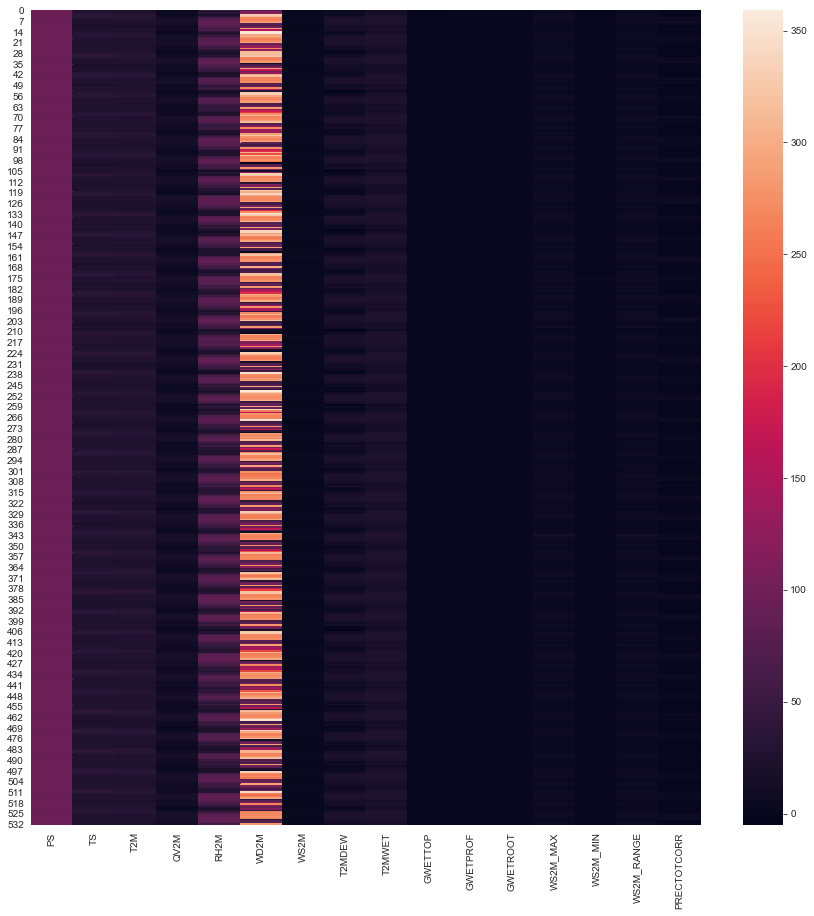

In [60]:
plt.figure(figsize = (15,15))
sns.heatmap(district[['PS', 'TS', 'T2M', 'QV2M', 'RH2M', 'WD2M', 'WS2M',
       'T2MDEW', 'T2MWET', 'GWETTOP', 'GWETPROF', 'GWETROOT', 'WS2M_MAX',
       'WS2M_MIN', 'WS2M_RANGE', 'PRECTOTCORR']])

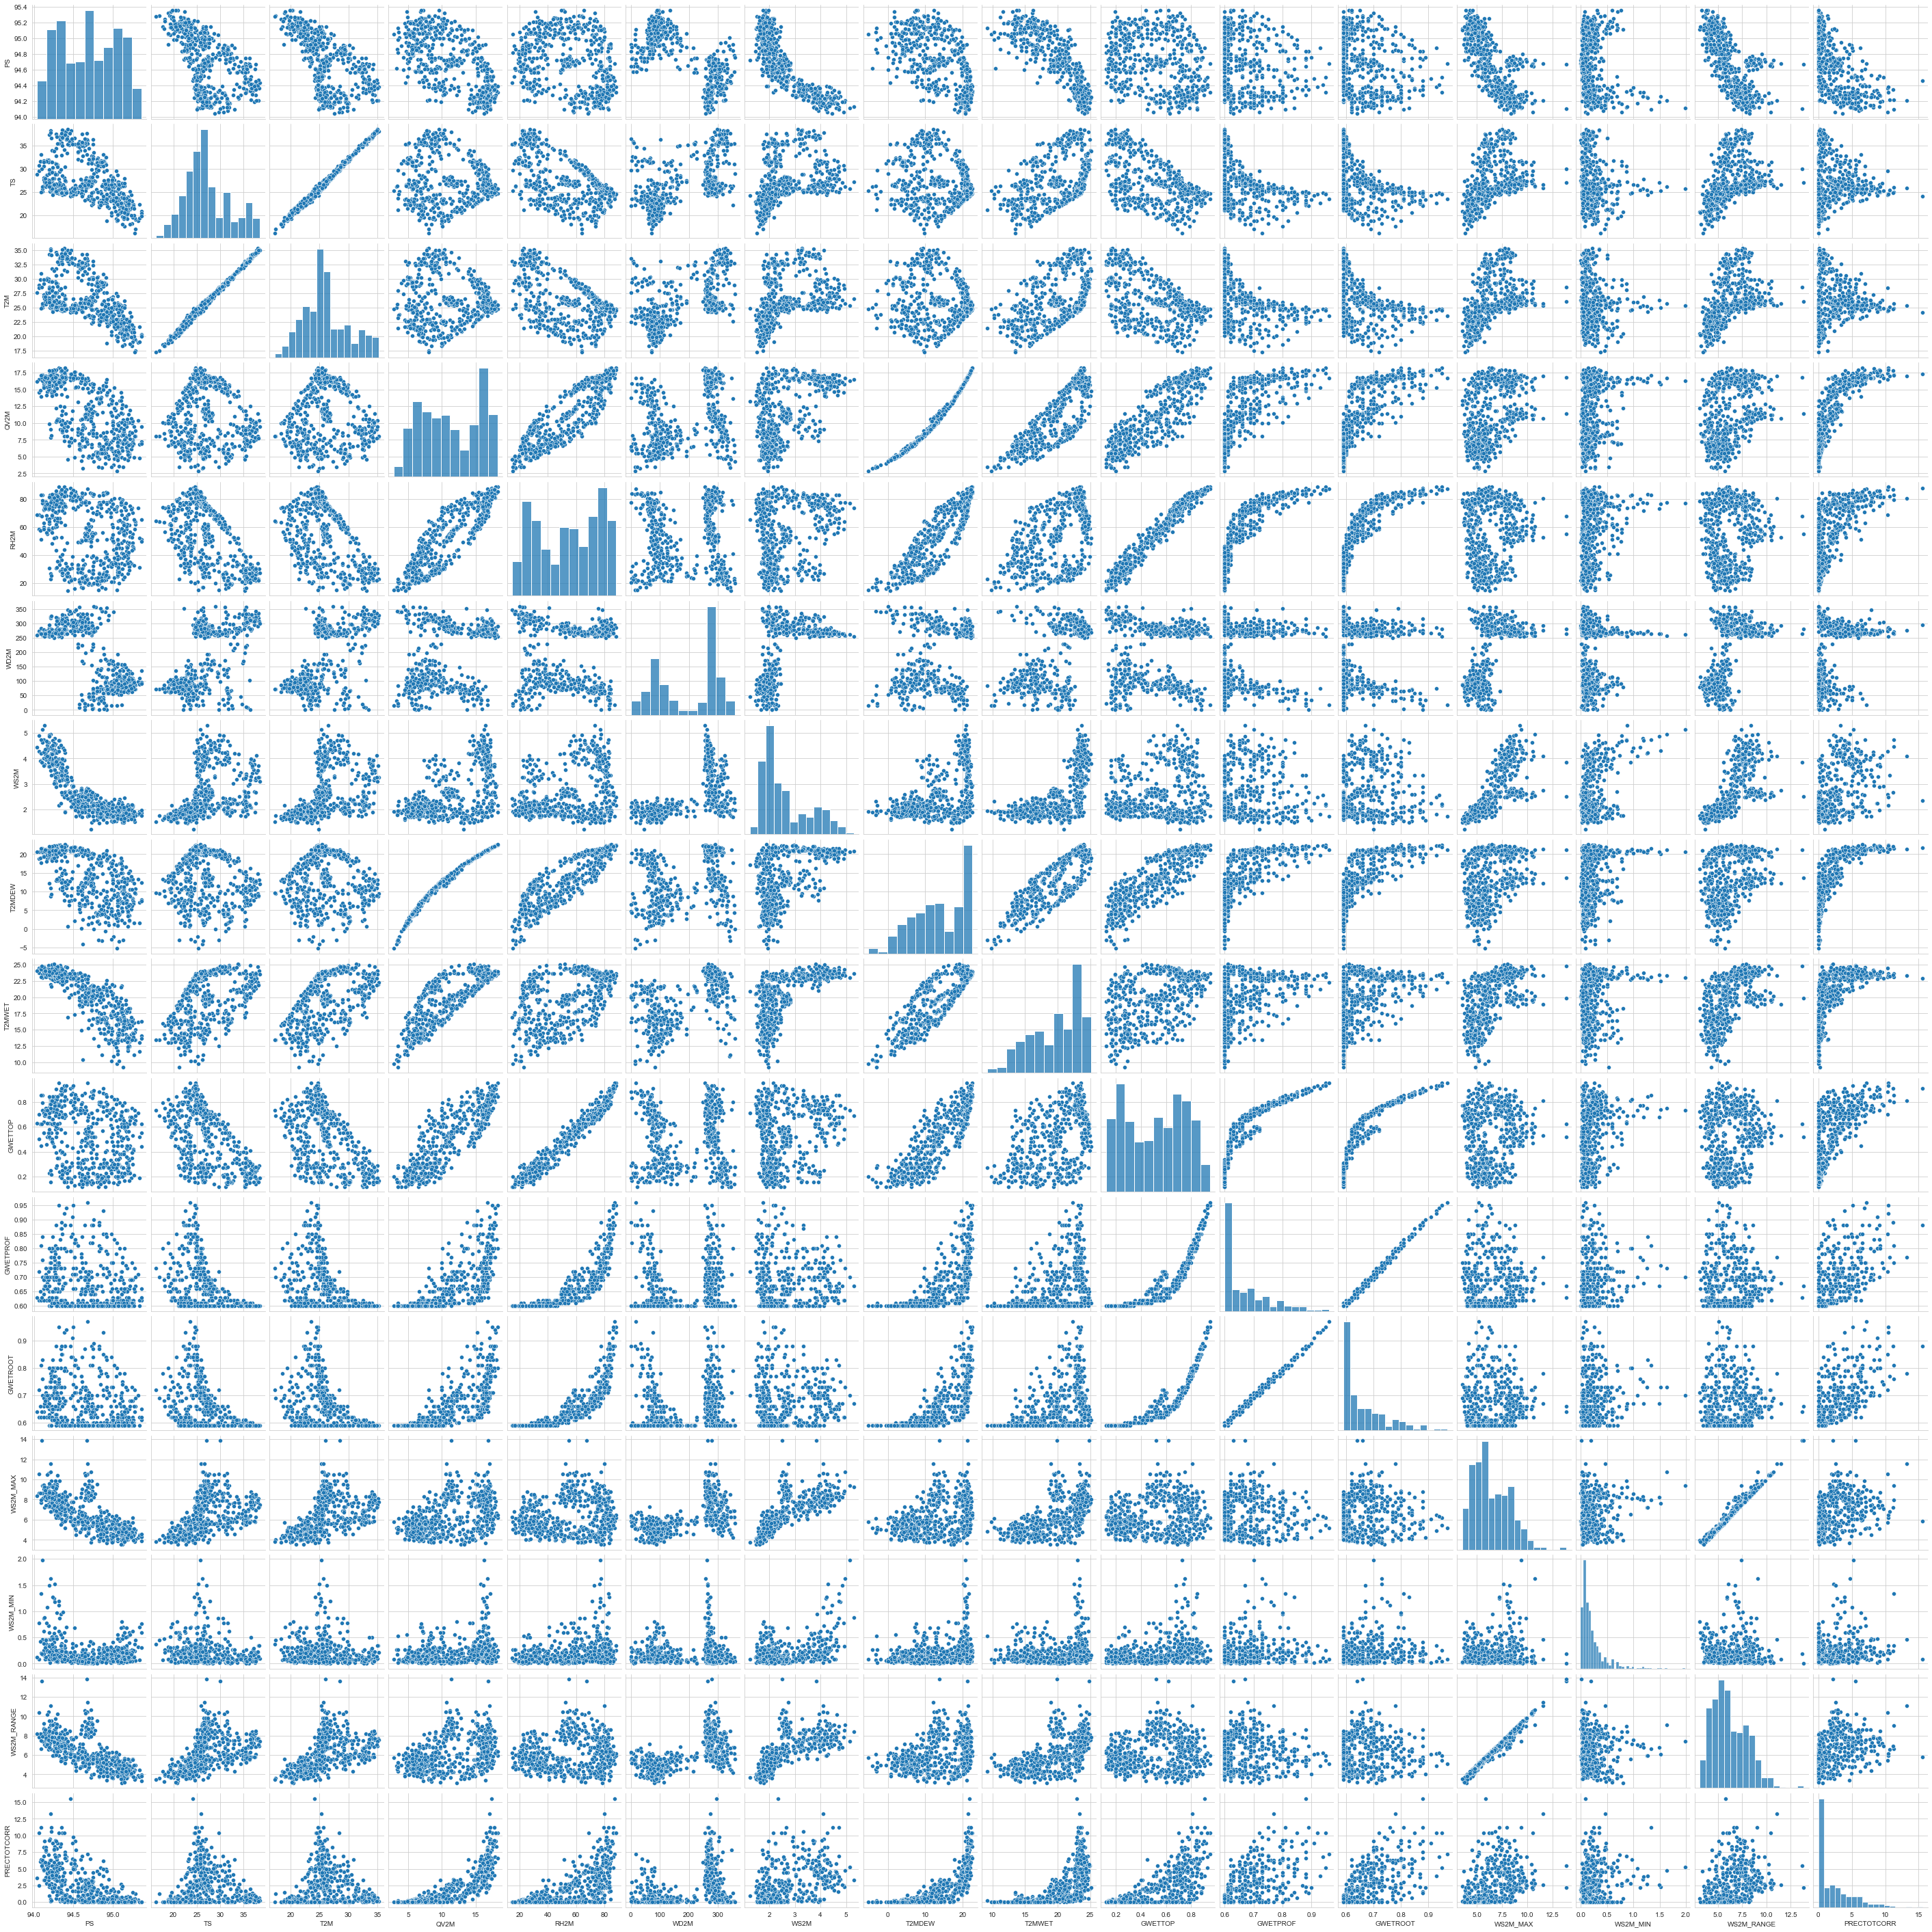

In [59]:
sns.pairplot(district[['PS', 'TS', 'T2M', 'QV2M', 'RH2M', 'WD2M', 'WS2M',
       'T2MDEW', 'T2MWET', 'GWETTOP', 'GWETPROF', 'GWETROOT', 'WS2M_MAX',
       'WS2M_MIN', 'WS2M_RANGE', 'PRECTOTCORR']])